In [49]:
from keras import layers, Model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# generating data

In [50]:
length  = 5000
X = np.random.randn(length)
Y = 5*X**3-68*X**2-7*X+1
Y /= np.max(Y)

# Creating model

In [51]:
x = layers.Input(1)
h = layers.Dense(32, activation='relu')(x)
h = layers.Dense(64, activation='relu')(h)
h = layers.Dense(128, activation='relu')(h)
y = layers.Dense(1)(h)

model = Model(x, y)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_44 (Dense)            (None, 32)                64        
                                                                 
 dense_45 (Dense)            (None, 64)                2112      
                                                                 
 dense_46 (Dense)            (None, 128)               8320      
                                                                 


 dense_47 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# model fitting

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),loss='mean_squared_error',metrics=['accuracy'])
fitted_model=model.fit( X[ : int( length * .9 )], Y[ : int( length * .9 )], epochs=10, validation_data=( X[int(length * .9): int(length * .95)], Y[int(length * .9): int(length * .95)]))

performance=fitted_model.history

Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 6217.8022 - accuracy: 0.0000e+00 - val_loss: 2113.2751 - val_accuracy: 0.0000e+00
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 1577.0720 - accuracy: 0.0000e+00 - val_loss: 808.4357 - val_accuracy: 0.0000e+00
Epoch 3/10
141/141 [==============================] - 0s 2ms/step - loss: 582.0424 - accuracy: 2.2222e-04 - val_loss: 255.1303 - val_accuracy: 0.0000e+00
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 252.8450 - accuracy: 0.0000e+00 - val_loss: 109.6365 - val_accuracy: 0.0000e+00
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 140.0954 - accuracy: 0.0000e+00 - val_loss: 62.4271 - val_accuracy: 0.0000e+00
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 86.3825 - accuracy: 0.0000e+00 - val_loss: 56.8226 - val_accuracy: 0.0000e+00
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 58

# showing results

8/8 [==============================] - 0s 2ms/step


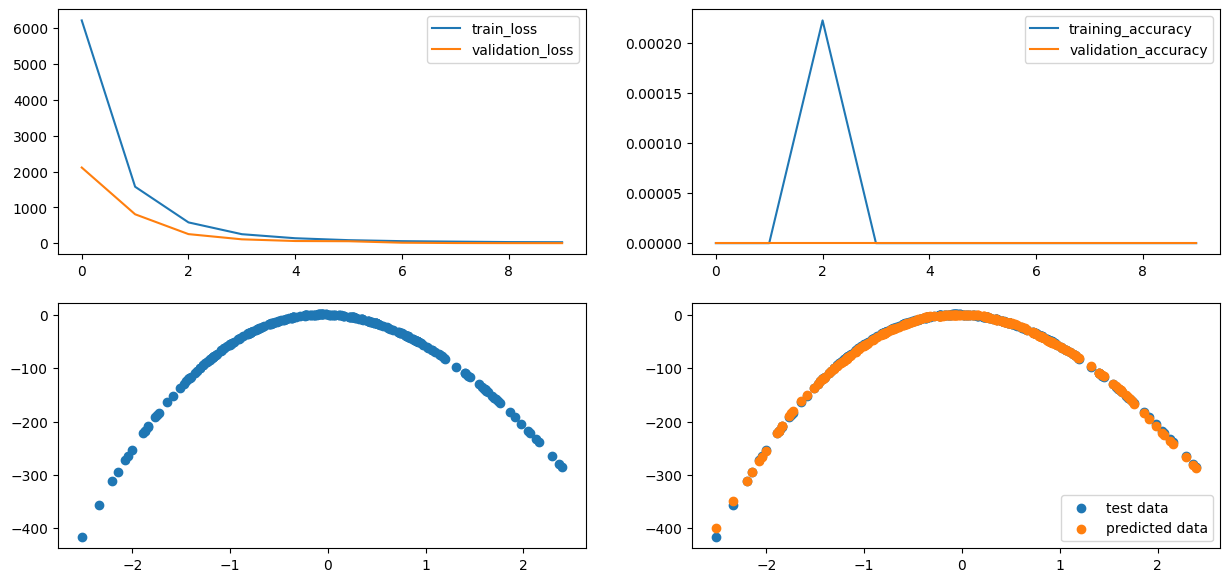

In [53]:
plt.figure(figsize = (15, 7))
plt.subplot(2,2,1)
plt.plot(performance['loss'])
plt.plot(performance['val_loss'])
plt.legend(['train_loss', 'validation_loss'])
	
plt.subplot(2,2,2)
plt.plot(performance['accuracy'])
plt.plot(performance['val_accuracy'])
plt.legend(['training_accuracy','validation_accuracy'])
plt.subplot(2,2,3)
plt.scatter(X[int(length * .9): int(length * .95)], Y[int(length * .9): int(length * .95)])

plt.subplot(2,2,4)
plt.scatter(X[int(length * .9): int(length * .95)], Y[int(length * .9): int(length * .95)])
plt.scatter(X[int(length * .9): int(length * .95)],model.predict(X[int(length * .9): int(length * .95)]))
plt.legend(['test data','predicted data'])